In [25]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [26]:
#reading dataset
train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


As we can see that there are 12 columns in which 11 are independent variables (features).
7 columns consists of a categorical values(Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, Outlet_Type).
we can also see that one is dependent variable(Item_Outlet_Sales).According to 12 features and one output means topredict the sales of Bigmart. So it is a Regression problem.

In [27]:
#check test data
test=pd.read_csv('bigdatamart_Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


As we can see that there are 11columns in which all are independent variable(features).
7 columns have categorical values and 3 are integers.. 
But in this case the Label data is missing as we will use this dataset to predict the sale.

In [28]:
#checking datatypes
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

As we can see that there are different data types are present in Train dataset. 
The columns, like Item_Identifier, Item_Fat_Content, Item_Type,Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type are containing objects.
Item_Weight, Item_Visibility, Item_MRP and Item_Outlet_Sales are containing floats,
And Outlet_Establishment_Year is containing integers only.

In [29]:
#checking datatypes
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

As we can see that in test datatypes , the columns like, (Item_Identifier, Item_Fat_Content, Item_Type, outlet_Identifier,Outlet_Size, Outlet_Location_Type, Outlet_Type)
are object whereas data like float are(Item_Weight, Item_Visibility, Item_MRP,) and Outlet_Establishment_Year have integer value

In [30]:
#checking the shape of data set
train.shape

(8523, 12)

in these dataset 8523 has rows and 11 columns.

In [31]:
#checking the shape of data set
test.shape

(5681, 11)

whereas test dataset having 5681 rows and 11 columns

In [32]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


As we can see that most of the columns contaning 8523 values but Item_Weight contaning 7060 and Outlet_size contaning 6113 values.

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In this case we can see that allcolumns containing 5681 count, except Item_Weight containing 4705 and Outlet_SIze contaning 4075 count.

In [36]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


As the dataset is containing 8523 count of values, there is some missing values present in Item_weight as it contains 7060 out of 8523 counts of values. In Item Visibility the minimum value is showing 0.000000, which is not possible in real time, so there maybe some skewness present that we need to deal with later. Minimum Item_MRP is the price of each product , so it shows the price ranges from 31.29 to 266.88. 

In [37]:
# test dataset stats summary
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [38]:
#checking null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

there are some missing values present in Item_weight column and Outlet_size of train dataset. So, the count of the missing values is 1463 for ItemWeight and 2410 for Outlet Size

# Let's check the distribution of continuous independent variables.

In [39]:

# only taking the continuous features of train dataset:
train_features=train[['Item_Weight',
       'Item_Visibility', 'Item_MRP']]

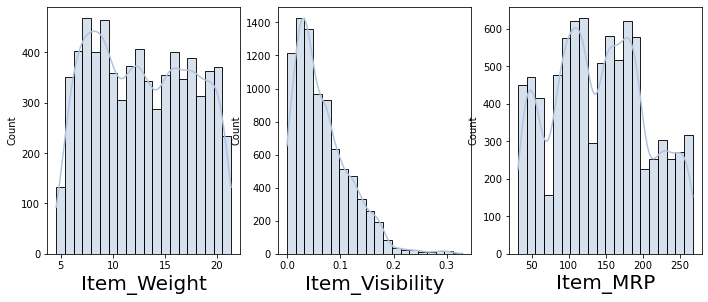

In [40]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=10:
        ax=plt.subplot(2,5,plotnumber)
        sns.histplot(train_features[column],kde=True,bins=20,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show();

# check the outliers of dataset

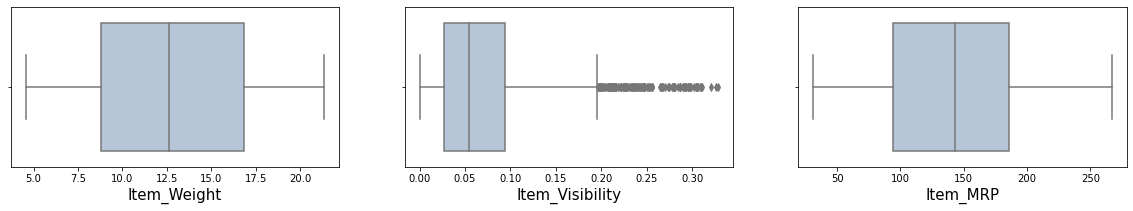

In [41]:
plt.figure(figsize=(20,10),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train_features[column],color='lightsteelblue')
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show();

There are ouliers in Item_Visibility.

now check the categorical values

In [42]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

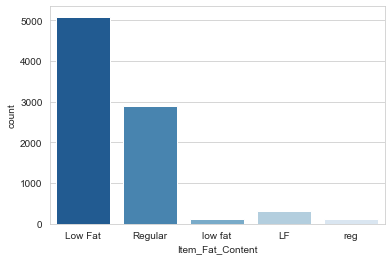

In [43]:
sns.set_style('whitegrid')
sns.countplot(train['Item_Fat_Content'],palette='Blues_r');

In [44]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In this case 16 different categories of things with 16 different values are present in the Item_type variable. Where fruirs and vegetables are highest in counts 1232 and seafood has lowest in counts 64 in dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

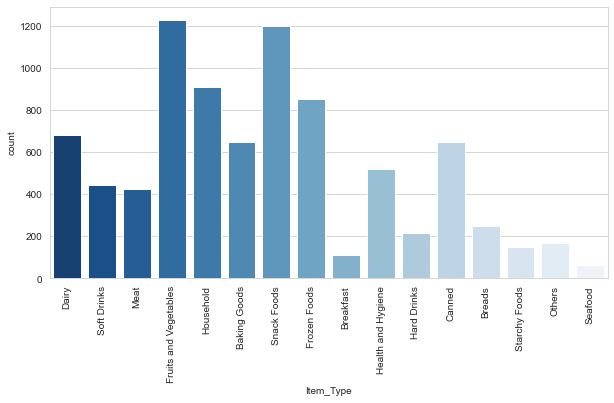

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(train['Item_Type'],palette='Blues_r');
plt.xticks(rotation=90)

We can see in this graph snack Foods is the second hhighest counts.

In [46]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1985'),
  Text(1, 0, '1987'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2002'),
  Text(6, 0, '2004'),
  Text(7, 0, '2007'),
  Text(8, 0, '2009')])

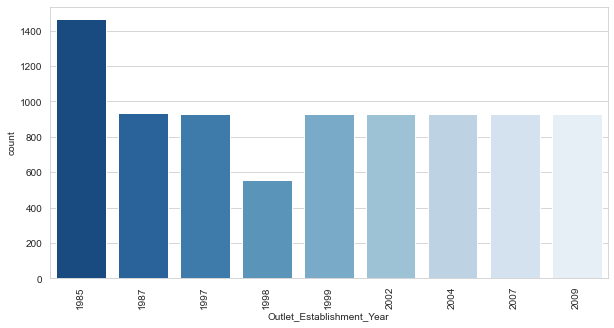

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(train['Outlet_Establishment_Year'],palette='Blues_r')
plt.xticks(rotation=90)


A big numbers of the stores are established on 1985. And in 1998 the number is lowest.

In [48]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The outlet size varies by High, Medium and Low and Medium sized stores are highest in counts i.e 2793 where as small size stores are 2388 in counts 

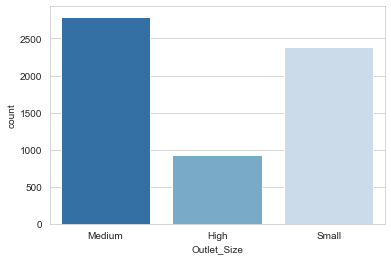

In [49]:
sns.countplot(train['Outlet_Size'],palette='Blues_r');


As we have already seen the medium sized outlets are highest in numbers, small sized outlets are 2nd highest in numbers and Bigger sized outlets are lowest in numbers.

In [50]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

As we can see that Tier 3, Tier 2 and Tier 1 are situated in train dataset in which Tier 3 have maximum counts 3350 2nd highest is Tier 2 i.e 2785 and the 3rd one is which is lowest Tier 1 2388 counts

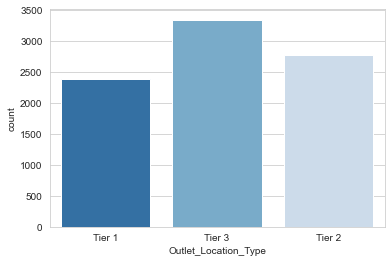

In [51]:
sns.countplot(train['Outlet_Location_Type'],palette='Blues_r');

Throgh this graph it is clearly shown that Tier 3 have highest counts.

In [52]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

As we can see that there are 3 Supermarket and 1 Grocery Store, in which Supermarket Type 1 is the highest count 5577 then 2nd highest is Grocery Store i.e 1083 counts, Type 3 is the 3rd 935 counts and Type 2 is last 928counts

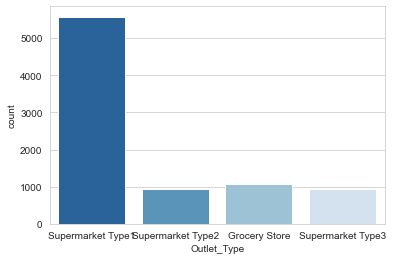

In [53]:
sns.countplot(train['Outlet_Type'],palette='Blues_r');

We can see clearly through this graph that Supermarket 2 have the highest counts.

# Bivariate Analysis:

we will do Bivariate Analysis in train dataset. First we will divide the train dataset into features and label

In [54]:
# dividing the feature and label for further operations:
y = train['Item_Outlet_Sales']
x = train.drop(columns=['Item_Outlet_Sales'])
x

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2


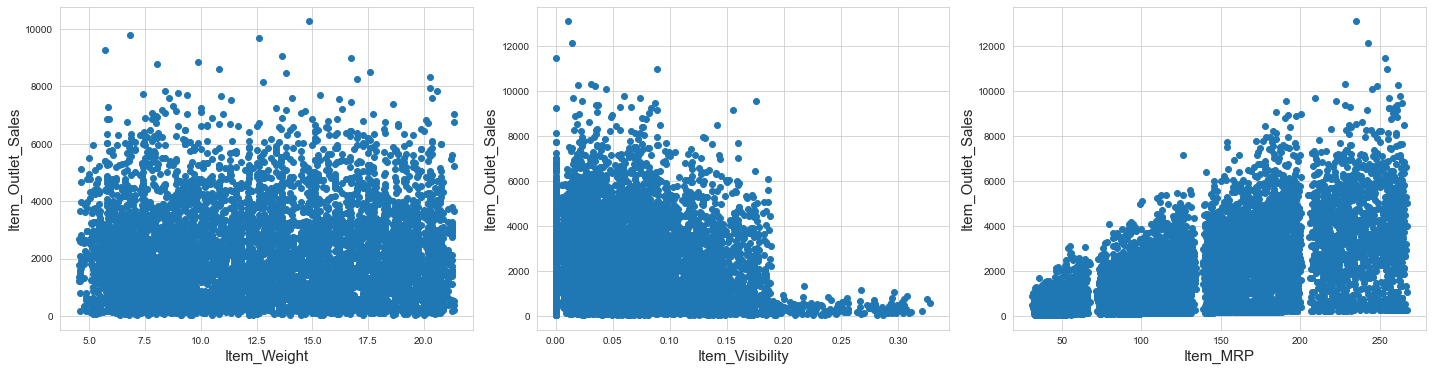

In [55]:
#For checking we are using scatter plot.

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in train_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(train_features[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Item_Outlet_Sales',fontsize=15)
    plotnumber+=1
plt.tight_layout();

Here we can see that the positive correlation between  Item_MRP with Item_Outlet_Sales.

# Now lets check categorical data with label

For that we are checking relation between 'Item_Type' and 'Item_Outlet_Sales'

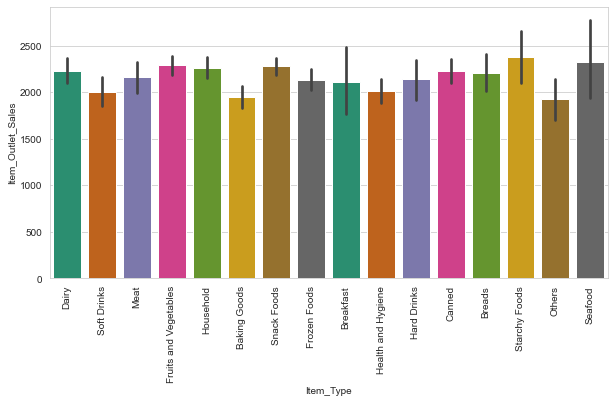

In [56]:
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=train,palette='Dark2')
plt.xticks(rotation=90)
plt.show();

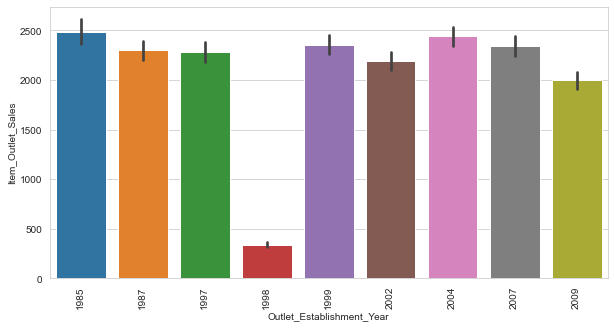

In [57]:
#Now let's check relation between 'Outlet_Establishment_Year' and 'Item_Outlet_Sales':
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)
plt.xticks(rotation=90)
plt.show()

As we can see with respect to item_outlet_sale in 1985 it was highest, followed by 2004,2007,1999. The lowest selling was 1998 according to train dataset.

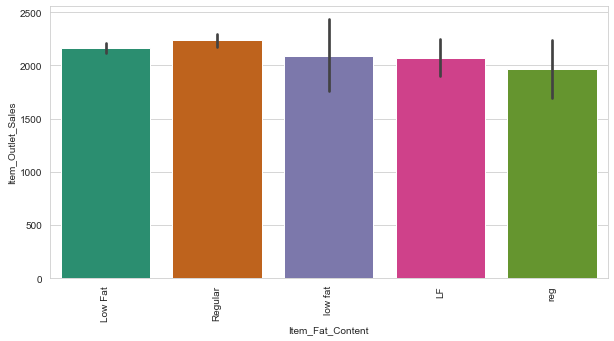

In [58]:
#Now let's check relation between 'Item_Fat_Content' and 'Item_Outlet_Sales':

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)
plt.show();

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

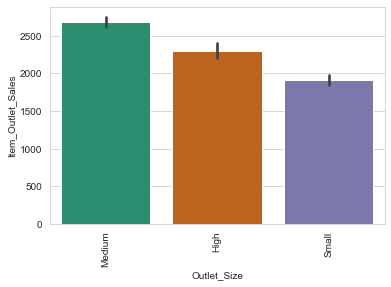

In [59]:
#Now let's check relation between 'Outlet_Size' and 'Item_Outlet_Sales':
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',palette='Dark2',data=train)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

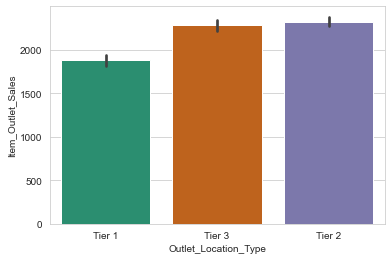

In [60]:
#Now let's check relation between 'Outlet_Location_Type' and 'Item_Outlet_Sales':
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',palette='Dark2',data=train)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

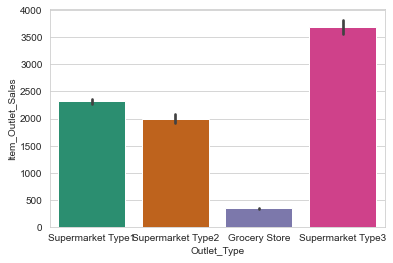

In [61]:
#Now let's check relation between 'Outlet_Type' and 'Item_Outlet_Sales':
sns.set_style('whitegrid')
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',palette='Dark2',data=train)

# Multicolinearity Detection:

Let's find the coefficient of multicolinearty to check if any feature is correlated to another featue or not

In [62]:
corr=train.corr()
corr.shape

(5, 5)

# Plot a heatmap for the train dataset first:

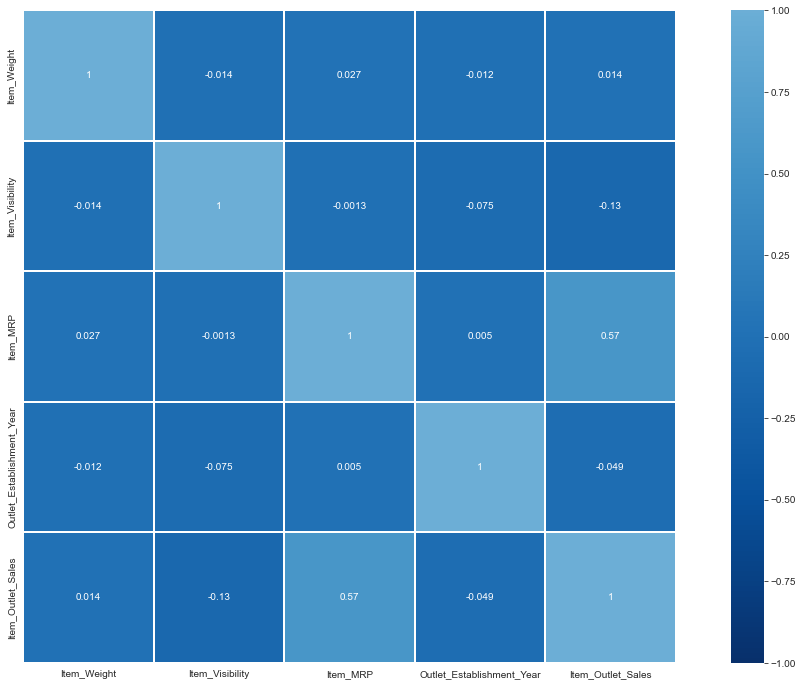

In [63]:
#Checking correlation matrix(heatmap) to understand the feature vs feature relationship.

plt.figure(figsize=(20,12))
sns.heatmap(corr,cbar=True,cmap='Blues_r',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

# Data preprocessing:

Firstly we will check the skewness of train dataset.

In [64]:
train.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

as we can see that there is no major skewness in the dataset, but 'item_Visibility' is somewhat right skewed.

now we are goint replace all zeros with mean of the same column, Item_Weight and Item_MRP in train dataset.

In [65]:
train['Item_Weight']=train['Item_Weight'].replace(0,train['Item_Weight'].mean())
train['Item_Visibility']=train['Item_Visibility'].replace(0,train['Item_Visibility'].mean())

In [66]:
features=['Item_Weight','Item_Visibility']

In [67]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')

In [68]:
train[features]=scaler.fit_transform(train[features].values)

In [69]:
train[features]

,Item_Weight,Item_Visibility
0,-0.724816,-1.501937
1,-1.607953,-1.316587
2,0.994429,-1.458786
3,1.306332,0.174855
4,-0.814400,0.174855
...,...,...
8518,-1.344453,-0.035286
8519,-0.950337,-0.285645
8520,-0.420708,-0.645619
8521,-1.251896,1.395813


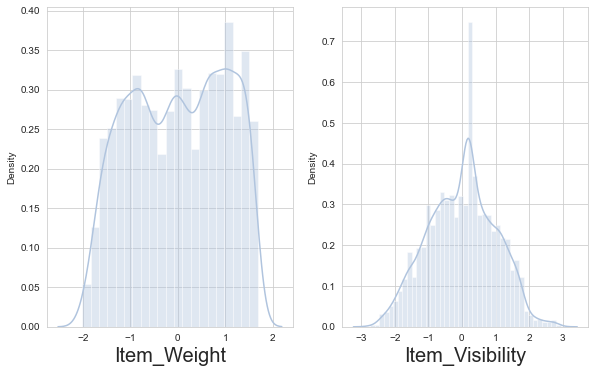

In [70]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in train[features]:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(train[column],kde=True,color='lightsteelblue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


As we can see, now the variables of train dataset are looking more normal than before.

Now next step is to replace those missing values of Item_Weight column of train dataset with mean of the same column.

In [71]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

As we can see there is no missing value present in Item_Weight of train dataset.

Now we are going to replacing the missing values of 'Outlet_size' with 0 of train dataset.

In [72]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(0) #replacing nan with 0.
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

now there is no missing value present in the train dataset.

In [73]:
print(len(train.select_dtypes(include=['int64', 'float64']).columns), len(train.select_dtypes(include='object').columns))

5 7


In [74]:
train['Outlet_Active_for'] = train['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
train= train.drop(columns=['Outlet_Establishment_Year'])
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,FDA15,-0.724816,Low Fat,-1.501937,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,-1.607953,Regular,-1.316587,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,0.994429,Low Fat,-1.458786,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,1.306332,Regular,0.174855,Fruits and Vegetables,182.0950,OUT010,0,Tier 3,Grocery Store,732.3800,23
4,NCD19,-0.814400,Low Fat,0.174855,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


In [75]:
train.drop(columns=['Item_Identifier'],axis=1,inplace=True)
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,-0.724816,Low Fat,-1.501937,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,-1.607953,Regular,-1.316587,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,12
2,0.994429,Low Fat,-1.458786,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,1.306332,Regular,0.174855,Fruits and Vegetables,182.0950,OUT010,0,Tier 3,Grocery Store,732.3800,23
4,-0.814400,Low Fat,0.174855,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,34


# Encoding:

Now let's do encode categorical columns as much as possible by using different methods like label encoder.

In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_s = ['Outlet_Identifier','Item_Type']
for i in le_s:
    train[i] = le.fit_transform(train[i])
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Active_for
0,-0.724816,Low Fat,-1.501937,4,249.8092,9,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,-1.607953,Regular,-1.316587,14,48.2692,3,Medium,Tier 3,Supermarket Type2,443.4228,12
2,0.994429,Low Fat,-1.458786,10,141.6180,9,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,1.306332,Regular,0.174855,6,182.0950,0,0,Tier 3,Grocery Store,732.3800,23
4,-0.814400,Low Fat,0.174855,9,53.8614,1,High,Tier 3,Supermarket Type1,994.7052,34


In [77]:
# droping the first column in the one-hot-encoded data to avoid collinearity
train= pd.get_dummies(data=train, drop_first=True)
train.shape

(8523, 19)

In [78]:
train.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Outlet_Active_for,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.724816,-1.501937,4,249.8092,9,3735.1380,22,1,0,0,0,0,1,0,0,0,1,0,0
1,-1.607953,-1.316587,14,48.2692,3,443.4228,12,0,1,0,0,0,1,0,0,1,0,1,0
2,0.994429,-1.458786,10,141.6180,9,2097.2700,22,1,0,0,0,0,1,0,0,0,1,0,0
3,1.306332,0.174855,6,182.0950,0,732.3800,23,0,1,0,0,0,0,0,0,1,0,0,0
4,-0.814400,0.174855,9,53.8614,1,994.7052,34,1,0,0,0,1,0,0,0,1,1,0,0


 we are going to use label encoder for the columns : 'Outlet_identifier','Item_Type' of test dataset.

In [79]:
l = LabelEncoder()
l_s = ['Outlet_Identifier','Item_Type']
for i in l_s:
    test[i] = l.fit_transform(test[i])
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,13,107.8622,9,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,4,87.3198,2,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,11,241.7538,0,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,13,155.0340,2,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,4,234.2300,5,1985,Medium,Tier 3,Supermarket Type3


In [80]:
y=train['Item_Outlet_Sales']
x=train.drop(columns=['Item_Outlet_Sales'])

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [82]:
## Importing machine learning Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [83]:
def maxr2_score(clf,x,y):
    maxr2_score1=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        r2_cscore=r2_score(y_test,pred)
        if r2_cscore>maxr2_score1:
            maxr2_score1=r2_cscore
            final_r=i
    print('max r2 score corresponding to',final_r,'is',maxr2_score1*100)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='r2').mean()*100)
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='r2').std()*100)
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train)*100)
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test)*100)
    print('\n')
    print('MAE',mean_absolute_error(y_test,pred))
    print('\n')
    print('MSE',mean_squared_error(y_test,pred))
    print('\n')
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    sns.regplot(pred,y_test)
    return final_r

# LinearRegression

max r2 score corresponding to 62 is 58.59802272120045


cross validation score 56.12530138763814


Standard Deviation 0.8671318211003957


Training accuracy 56.08632423531388


Test Accuracy 57.115303398364844


MAE 858.6692476382087


MSE 1328420.3859028227


RMSE 1152.5712064349095




62

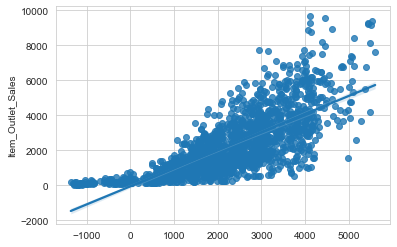

In [84]:
lr = LinearRegression()
maxr2_score(lr,x,y)

# Decision Tree

max r2 score corresponding to 84 is 26.333490948753457


cross validation score 15.645669535362346


Standard Deviation 5.661950001509958


Training accuracy 100.0


Test Accuracy 23.57183093038161


MAE 1062.4859829912023


MSE 2367481.7800958264


RMSE 1538.6623346582012




84

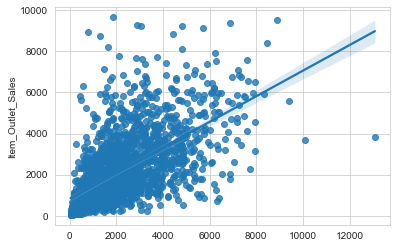

In [85]:
dt = DecisionTreeRegressor()
maxr2_score(dt,x,y)

# KNN

In [ ]:
knn = KNeighborsRegressor()
maxr2_score(knn,x,y)

max r2 score corresponding to 89 is 47.606887468459604




# Ridge

In [ ]:
ridge=Ridge()
maxr2_score(ridge,x,y)

# SVM

In [ ]:
svm = SVR()
maxr2_score(svm,x,y)

In [ ]:
rf = RandomForestRegressor()
maxr2_score(rf,x,y)

# Hyperparameter Tuning

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=48,test_size=.20)
forest=RandomForestRegressor()
param={'n_estimators':[50,100,200],'max_depth':[10,50,None],'max_features': [1,2,3],'bootstrap': [True, False]}
glf=GridSearchCV(estimator=forest,param_grid=param,scoring='r2',n_jobs=-1)
glf.fit(x_train,y_train)
glf.best_params_

In [ ]:
forest=RandomForestRegressor(bootstrap=True,max_depth=10,max_features=3,n_estimators=200)
forest.fit(x_train,y_train)
pred=forest.predict(x_test)
print(' Mean Absolute Error (MAE) :',mean_absolute_error(pred,y_test)*100)
print('Mean Squared Error (MSE) :',mean_squared_error(pred,y_test)*100)
print('Root Mean Squared Error :',np.sqrt(mean_squared_error(pred,y_test))*100)
print('R_2 score:',r2_score(pred,y_test)*100)
## best fit line
sns.regplot(pred,y_test,color='r')

In [ ]:
# saving the model
import joblib
joblib.dump(forest,'bigmart.pkl')

In [ ]:
loaded_model=joblib.load('bigmart.pkl')
prediction=loaded_model.predict(x_test)

In [ ]:
prediction